<a href="https://colab.research.google.com/github/gyeongseoMin/DataScience/blob/main/%EB%AF%BC%EA%B2%BD%EC%84%9C_20203060_p02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task 1-1
import zipfile
from zipfile import ZipFile
import requests
import random
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


r = requests.get("https://files.grouplens.org/datasets/movielens/ml-latest-small.zip")

with open("ml-latest-small.zip", "wb") as f:
    f.write(r.content)
zipfile.ZipFile("ml-latest-small.zip").extractall()


In [ ]:
data = []
with open("/content/ml-latest-small/ratings.csv", "r") as f:
    for line in f:
        data.append(line.strip().split("\t"))
data

[['userId,movieId,rating,timestamp'],
 ['1,1,4.0,964982703'],
 ['1,3,4.0,964981247'],
 ['1,6,4.0,964982224'],
 ['1,47,5.0,964983815'],
 ['1,50,5.0,964982931'],
 ['1,70,3.0,964982400'],
 ['1,101,5.0,964980868'],
 ['1,110,4.0,964982176'],
 ['1,151,5.0,964984041'],
 ['1,157,5.0,964984100'],
 ['1,163,5.0,964983650'],
 ['1,216,5.0,964981208'],
 ['1,223,3.0,964980985'],
 ['1,231,5.0,964981179'],
 ['1,235,4.0,964980908'],
 ['1,260,5.0,964981680'],
 ['1,296,3.0,964982967'],
 ['1,316,3.0,964982310'],
 ['1,333,5.0,964981179'],
 ['1,349,4.0,964982563'],
 ['1,356,4.0,964980962'],
 ['1,362,5.0,964982588'],
 ['1,367,4.0,964981710'],
 ['1,423,3.0,964982363'],
 ['1,441,4.0,964980868'],
 ['1,457,5.0,964981909'],
 ['1,480,4.0,964982346'],
 ['1,500,3.0,964981208'],
 ['1,527,5.0,964984002'],
 ['1,543,4.0,964981179'],
 ['1,552,4.0,964982653'],
 ['1,553,5.0,964984153'],
 ['1,590,4.0,964982546'],
 ['1,592,4.0,964982271'],
 ['1,593,4.0,964983793'],
 ['1,596,5.0,964982838'],
 ['1,608,5.0,964982931'],
 ['1,648,

In [ ]:
#test, train 나누기
random.shuffle(data)

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train = data[:train_size]
test = data[train_size:]

# print(len(train), len(test))
train

[['610,4105,5.0,1479542650'],
 ['524,344,3.0,851608987'],
 ['414,2615,2.0,961515355'],
 ['280,6539,3.5,1348435219'],
 ['182,2153,1.5,1063285553'],
 ['89,78469,4.0,1520409011'],
 ['610,5954,5.0,1493845265'],
 ['260,8507,3.0,1109410482'],
 ['493,1527,3.0,1001562930'],
 ['414,5364,3.5,1074530440'],
 ['599,3258,2.5,1498514571'],
 ['414,8807,4.0,1128977177'],
 ['233,3949,4.5,1529334158'],
 ['46,434,4.0,834787826'],
 ['603,214,4.0,963179452'],
 ['219,45666,1.0,1195944796'],
 ['220,30793,3.0,1230062185'],
 ['600,1551,1.5,1237762937'],
 ['462,3978,0.5,1123892413'],
 ['66,4499,4.0,1093747840'],
 ['493,2916,3.0,1001562812'],
 ['600,7934,3.5,1237764012'],
 ['182,912,5.0,1054780481'],
 ['577,590,5.0,945965737'],
 ['6,292,4.0,845553253'],
 ['11,1573,3.0,902154542'],
 ['583,99117,2.0,1481474293'],
 ['452,1645,4.0,1013398024'],
 ['474,6990,3.5,1087831899'],
 ['599,51091,3.0,1498523395'],
 ['45,50872,5.0,1193288853'],
 ['489,2124,2.5,1385824159'],
 ['593,1476,4.0,1181007207'],
 ['307,40581,2.5,1186259

In [ ]:
# Task 2-2 movies.csv 파일 읽기, 장르 집합 변환
movie_data = pd.read_csv("/content/ml-latest-small/movies.csv")
movie_data = movie_data['genres']
movie_data = movie_data.values.tolist()
movie_data = set(movie_data)
set_movie = []
for i in movie_data:
    if(i.find("|") != -1):
        set_movie.append(set(i.split("|")))

    else:
        set_movie.append(set([i]))
set_movie

[{'Documentary', 'Drama'},
 {'Drama', 'Mystery', 'War'},
 {'Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'},
 {'Comedy', 'Crime', 'Mystery'},
 {'Action', 'Adventure', 'Animation', 'Horror'},
 {'Animation', 'Comedy', 'Drama'},
 {'Adventure', 'Comedy', 'Fantasy', 'IMAX', 'Romance'},
 {'Crime', 'Drama', 'Romance', 'Thriller'},
 {'Adventure', 'Children', 'Comedy', 'Fantasy', 'Musical'},
 {'Action', 'Adventure', 'Animation', 'Comedy'},
 {'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance'},
 {'Action', 'Adventure', 'Crime', 'Thriller'},
 {'Children', 'Drama', 'Fantasy', 'Mystery'},
 {'Comedy', 'Fantasy', 'Horror', 'Thriller'},
 {'Comedy', 'Crime', 'Musical', 'Mystery'},
 {'Adventure', 'Comedy', 'Documentary'},
 {'Action', 'Adventure', 'Comedy', 'Fantasy', 'Romance'},
 {'Animation', 'Children', 'Drama', 'Fantasy'},
 {'Drama', 'IMAX', 'Sci-Fi', 'Thriller'},
 {'Action', 'Adventure', 'Crime'},
 {'Children', 'Drama', 'Fantasy', 'Mystery', 'Thriller'},
 {'Comedy', 'Musical', 'W

In [ ]:
# Task 1-3
tag_data = pd.read_csv("/content/ml-latest-small/tags.csv")
tag_data = tag_data[['movieId', 'tag']]
tag_data['tag'] = tag_data['tag'].str.lower()
tag_data = tag_data.groupby(['movieId'])['tag'].apply(set)
tag_data = pd.DataFrame(tag_data)
tag_data

,tag
movieId,
1,"{fun, pixar}"
2,"{fantasy, robin williams, magic board game, game}"
3,"{moldy, old}"
5,"{pregnancy, remake}"
7,{remake}
...,...
183611,"{rachel mcadams, comedy, funny}"
184471,"{alicia vikander, adventure, video game adapta..."
187593,"{sarcasm, ryan reynolds, josh brolin}"


In [ ]:
#Task 2
data_2 = []
with open("/content/ml-latest-small/ratings.csv", "r") as f:
    for line in f:
        data_2.append(line.strip().split(","))


random.shuffle(data_2)

train_size = int(len(data_2) * 0.8)
test_size = len(data_2) - train_size

train = data_2[:train_size]
test = data_2[train_size:]
for i in train:
    if 'userId' in i :
        train.remove(i)
train
train = np.array(train, dtype=np.float32)
    
train_frame = pd.DataFrame(train, columns = ['userId', 'movieId', 'rating', 'timestamp']) 
train_frame

for i in test:
    if 'userId' in i :
        test.remove(i)
test
test = np.array(test, dtype=np.float32)
test_frame = pd.DataFrame(test, columns = ['userId', 'movieId', 'rating', 'timestamp'])
test_frame 

users = torch.LongTensor(train_frame['userId'])
items = torch.LongTensor(train_frame['movieId'])
ratings = torch.FloatTensor(train_frame['rating'])
users_test = torch.LongTensor(test_frame['userId'])
items_test = torch.LongTensor(test_frame['movieId'])
ratings_test = torch.FloatTensor(test_frame['rating'])

In [ ]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001
#lambda3 = 0.001
#lambda4 = 0.001

bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)
#lr = 0.01

X = []
Y = []
Y_test = []

for epoch in range(1001):
    hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
    train_rmse = F.mse_loss(hypothesis, ratings)
    cost = train_rmse + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

    optimizer.zero_grad()
    # cost.backward()
    cost.backward()
    optimizer.step()
    
    X.append(epoch)
    Y.append(train_rmse)
    with torch.no_grad():
        hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
        test_rmse = F.mse_loss(hypo_test, ratings_test)
        Y_test.append(test_rmse)

    if epoch % 100 == 0:
        print("epoch: {}, cost: {:.6f}, train_rmse: {:.6f}, test_rmse: {:.6f}".format(epoch, cost.item(), train_rmse.item(), test_rmse.item()))

epoch: 0, cost: 226.735519, train_rmse: 13.194453, test_rmse: 10.229566
epoch: 100, cost: 0.607514, train_rmse: 0.416101, test_rmse: 0.776409
epoch: 200, cost: 0.588935, train_rmse: 0.391188, test_rmse: 0.762914
epoch: 300, cost: 0.585579, train_rmse: 0.385298, test_rmse: 0.761741
epoch: 400, cost: 0.584085, train_rmse: 0.382803, test_rmse: 0.760279
epoch: 500, cost: 0.583278, train_rmse: 0.381470, test_rmse: 0.758959
epoch: 600, cost: 0.582862, train_rmse: 0.380765, test_rmse: 0.758128
epoch: 700, cost: 0.582649, train_rmse: 0.380416, test_rmse: 0.757600
epoch: 800, cost: 0.582517, train_rmse: 0.380215, test_rmse: 0.757039
epoch: 900, cost: 0.582396, train_rmse: 0.380034, test_rmse: 0.756478
epoch: 1000, cost: 0.582256, train_rmse: 0.379817, test_rmse: 0.756300


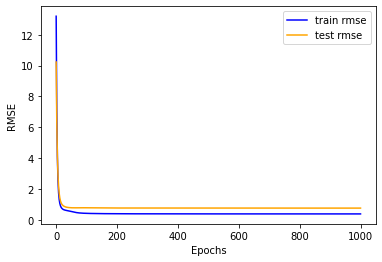

In [ ]:
plt.ylabel("RMSE")
plt.xlabel("Epochs")
plt.plot(X, Y, c = "blue", label = "train rmse")
plt.plot(X, Y_test, "orange", label = "test rmse")
plt.legend()

In [ ]:
# #예상 평점 계산
# with torch.no_grad():
#     print(P[1])
#     print(Q[1])
#     print((P[1] * Q[1]).sum())

tensor([ 0.6551, -1.1700,  0.2223,  0.6214, -0.5514, -0.5165,  0.0535, -1.3763,
         1.2504,  0.3906], requires_grad=True)
tensor([ 0.1855, -0.6798, -0.1582,  0.9793, -0.6228,  0.1545, -0.0735, -1.2272,
         0.8360,  0.3722], requires_grad=True)
tensor(4.6296)


In [ ]:
#Task 3
data_3 = pd.read_csv("/content/ml-latest-small/ratings.csv")
data_3 = data_3[['userId', 'movieId', 'rating']]
# data_3
data_3 = data_3.loc[data_3['userId'] == 514, :]
data_3
data_3.groupby(['movieId']).max()

,userId,rating
movieId,,
1,514,4.0
11,514,4.0
16,514,3.5
22,514,3.0
34,514,4.0
...,...,...
186587,514,3.0
187031,514,2.5
187593,514,3.5


In [ ]:
# Task 3-2
data_4 = pd.read_csv("/content/ml-latest-small/movies.csv")
data_4
data_4.groupby('movieId')
tag_data['tag']

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
#Task 4-1
def kmeans(k, points):
    prev_aasignment = []

    centroids = points[np.random.choice(points.shape[0], replace=False, size = k)]

    for epoch in range(10):
        assignments = [assign(p, centroids, k) for p in points]

        centroids = compute_centroids(assignments, points, k)

        if prev_assignment == assignments:
            break
        prev_assignment = assignments
    return assignments, centroids


In [ ]:
#중심점 계산
def assign(point, centroids, k):
    return min(range(k), key=lambda i : np.dot(centroids[i]-point, centroids[i]-point))


In [ ]:
#새로운 centroid 계산
def compute_centroids(assignments, points, k):
    vec_sum = [np.zeros(points[0]) for _ in range(k)]
    counts = [0] * k
    
    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1

    return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

In [ ]:
#Task 5 차원 축소 및 시각화(PCA)
#Task 5-1
Vectors = []
answers = []

Z = torch.cat([P, Q], dim=0).detach()


In [ ]:
def findPC(Z):
    w = torch.randn(Z.shape[1])
    w = w/(torch.dot(w, w) ** 0.5)

    lr = 0.1

    for epoch in range(1001):
        w.requires_grad_(True)
        variance = torch.mean(torch.sum(Z * w, dim=1) ** 2)

        variance.backward()
        with torch.no_grad():
            w = w + lr * w.grad
            w = w/(torch.dot(w, w) ** 0.5)

    return w, variance.item()

findPC(Z)

(tensor([ 0.0952,  0.0348,  0.3990,  0.2930, -0.6059,  0.0912, -0.2474,  0.4903,
          0.0847,  0.2458]), 0.0011778436601161957)

In [ ]:
#Task 5-2
def findPC(Z):
    w = torch.randn(Z.shape[1])
    w = w/(torch.dot(w, w) ** 0.5)

    lr = 0.1

    for epoch in range(1001):
        w.requires_grad_(True)
        variance = torch.mean(torch.sum(Z * w, dim=1) ** 2)

        variance.backward()
        with torch.no_grad():
            w = w + lr * w.grad
            w = w/(torch.dot(w, w) ** 0.5)

    return w, variance.item()

In [ ]:
def PCA(Z, n):
    W, V = [], []

    for _ in range(n):
        w, v = findPC(Z)
        W.append(w)
        V.append(v)
        Z = Z - (Z @ w.view(-1, 1)) * w

    return W, V

def transform(Z, W):
    return Z @ torch.stack(W).T

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
result = pca.fit_transform(Z)
result

array([[-3.84376316e-04,  1.07499093e-04],
       [-9.51861968e-03, -3.79675666e-01],
       [-1.31979132e-01, -4.22823113e-02],
       ...,
       [ 2.88299047e-01, -1.04361606e+00],
       [-1.65393285e-02,  8.20802307e-02],
       [ 1.93314982e+00, -5.42778891e-01]])